In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [23]:
df = pd.read_csv('rest_sample.csv',header = 0)
df = df.drop("Unnamed: 0",axis=1)
df.head(10)

,business_id,latitude,longitude,review_count,stars,min_dist_1,min_dist_2,min_dist_3,min_dist_4,min_dist_5
0,INhHx6Q9r4DO8vcHfBhnJg,33.406317,-111.875830,3,3.0,1.062497,1.285939,1.287012,1.349482,1.797396
1,5tgjLnwBS84rg49-OAs0Ug,35.090196,-80.866242,4,3.0,0.087906,7.976932,7.976932,8.009776,8.805099
2,8ZpXbFWIY4uEnmOJMr6gyQ,43.655321,-79.413309,11,4.0,65.142094,70.216318,71.249509,71.854464,82.740241
3,NnxwkiBvSSyKeFiez0DDcQ,36.123915,-115.167972,86,4.0,2.425172,2.841331,3.058603,4.185926,4.680326
4,j1fqqRf2Aa6H-igmGJ4eUw,33.390177,-111.864319,93,4.0,0.313484,0.645488,1.063968,1.181812,1.608256
5,8Z9kijurkcRurq3q3w7fPQ,33.641795,-111.994984,15,4.0,1.794694,5.933080,6.828799,7.386292,11.401903
6,25Ofn9RSdr8e0P2eyd-Q_A,43.556821,-79.701592,5,4.5,71.266242,76.761416,80.882304,81.645669,89.596563
7,efvSrLjCsOLcupG0loDAWQ,43.682376,-79.767930,3,2.5,84.708113,90.166251,93.509081,94.233192,103.041685
8,Baq-IZuaeBy_KCpC5KA92A,36.150025,-115.333047,3,1.0,2.936324,2.966008,3.289443,4.277668,4.605887
9,oEn9czSikd5SErn7xsw8yw,43.647867,-79.400216,19,4.5,63.916788,68.974130,69.948808,70.550960,81.478684


In [24]:
df["rating_power"] = df.apply(lambda row: (row["review_count"]*row["stars"]),axis=1)

In [25]:
#normalizing the stars and review counts
x = df.rating_power 
x_norm = preprocessing.MinMaxScaler().fit_transform(x.reshape(-1,1))
df["rating_norm"] = x_norm*5
df.head(6)

/home/sl4651/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,business_id,latitude,longitude,review_count,stars,min_dist_1,min_dist_2,min_dist_3,min_dist_4,min_dist_5,rating_power,rating_norm
0,INhHx6Q9r4DO8vcHfBhnJg,33.406317,-111.875830,3,3.0,1.062497,1.285939,1.287012,1.349482,1.797396,9.0,0.003378
1,5tgjLnwBS84rg49-OAs0Ug,35.090196,-80.866242,4,3.0,0.087906,7.976932,7.976932,8.009776,8.805099,12.0,0.005068
2,8ZpXbFWIY4uEnmOJMr6gyQ,43.655321,-79.413309,11,4.0,65.142094,70.216318,71.249509,71.854464,82.740241,44.0,0.023086
3,NnxwkiBvSSyKeFiez0DDcQ,36.123915,-115.167972,86,4.0,2.425172,2.841331,3.058603,4.185926,4.680326,344.0,0.192005
4,j1fqqRf2Aa6H-igmGJ4eUw,33.390177,-111.864319,93,4.0,0.313484,0.645488,1.063968,1.181812,1.608256,372.0,0.207770
5,8Z9kijurkcRurq3q3w7fPQ,33.641795,-111.994984,15,4.0,1.794694,5.933080,6.828799,7.386292,11.401903,60.0,0.032095


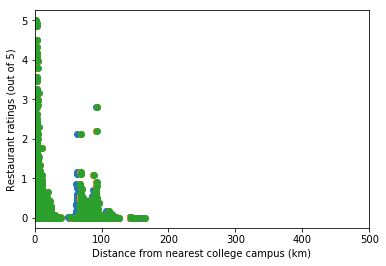

In [31]:
y0 = np.array(df["rating_norm"])
x0 = np.array(df[["min_dist_1","min_dist_2", "min_dist_3"]])
plt.xlabel("Distance from nearest college campus (km)")
plt.ylabel("Restaurant ratings (out of 5)")
plt.xlim(0, 500)
plt.plot(x0, y0, 'o')


In [6]:
#splitting the data in training and testing
y0 = np.array(df["rating_norm"])
x0 = np.array(df[["min_dist_1","min_dist_2","min_dist_3"]])
nt = x0.shape[0]
ns_train = int(nt*0.7)
ns_test = nt - ns_train
xtr = x0[:ns_train,:]
ytr = y0[:ns_train]
xts = x0[ns_train:,:]
yts = y0[ns_train:]


In [7]:
#using linear regression model 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

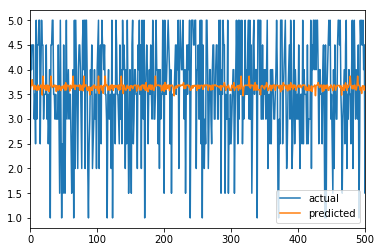

In [32]:
ytr_pred = regr.predict(xts)
plt.plot(yts)
plt.plot(ytr_pred)
plt.xlim(0, 500)
plt.legend(['actual', 'predicted'])

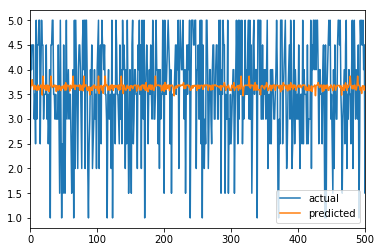

In [33]:
#predicting stars instead of rating_norm
y0 = np.array(df["stars"])
nt = x0.shape[0]
ns_train = int(nt*0.7)
ns_test = nt - ns_train
xtr = x0[:ns_train,:]
ytr = y0[:ns_train]
xts = x0[ns_train:,:]
yts = y0[ns_train:]
regr = linear_model.LinearRegression()
regr.fit(xtr,ytr)
ytrain_pred = regr.predict(xts)
plt.plot(yts)
plt.plot(ytrain_pred)
plt.xlim(0, 500)
plt.legend(['actual', 'predicted'])